In [0]:
#import the libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#upload the data
from google.colab import files
uploaded = files.upload()

Saving TCS.csv to TCS (1).csv


In [31]:
#store the data
TCS = pd.read_csv('TCS.csv')
TCS

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-28,7.67,7.75,7.52,7.54,7.048261,343100
1,2019-05-29,7.46,7.54,7.25,7.31,6.833261,397700
2,2019-05-30,7.27,7.34,7.08,7.11,6.646305,361100
3,2019-05-31,7.02,7.17,6.97,7.03,6.571522,518400
4,2019-06-03,6.97,7.21,6.96,7.04,6.580870,428000
...,...,...,...,...,...,...,...
246,2020-05-18,2.09,2.17,2.05,2.10,2.100000,278200
247,2020-05-19,2.12,2.16,2.04,2.07,2.070000,178800
248,2020-05-20,2.11,2.14,2.05,2.09,2.090000,208800
249,2020-05-21,2.10,2.28,2.10,2.18,2.180000,376800


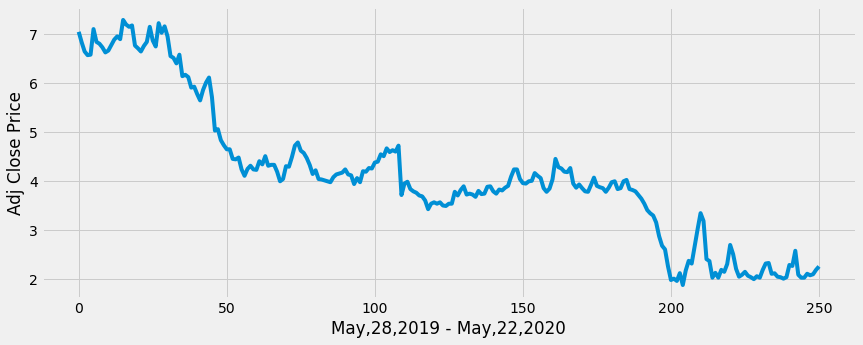

In [32]:
#visualise the data
plt.figure(figsize=(13,5))
plt.plot(TCS['Adj Close'], label = 'TCS')
plt.xlabel('May,28,2019 - May,22,2020')
plt.ylabel('Adj Close Price')
plt.show()

In [35]:
#create the simple moving 30 day average
sma30 = pd.DataFrame()
sma30['Adj Close'] = TCS['Adj Close'].rolling(window=30).mean()
sma30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,2.162333
247,2.158667
248,2.157000
249,2.153000


In [34]:
#create a simple moving 100 day average
sma100 = pd.DataFrame()
sma100['Adj Close']  = TCS['Adj Close'].rolling(window=100).mean()
sma100

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
246,3.064989
247,3.043343
248,3.021898
249,3.003315


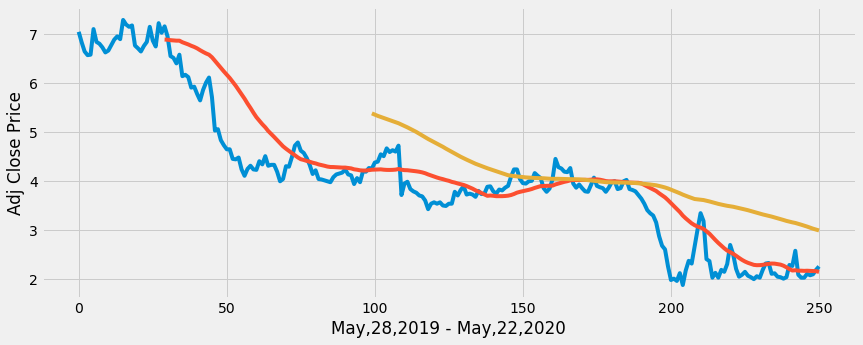

In [36]:
#visualise the data
plt.figure(figsize=(13,5))
plt.plot(TCS['Adj Close'],label='TCS')
plt.plot(sma30['Adj Close'],label='SMA30')
plt.plot(sma100['Adj Close'],label='SMA100')
plt.xlabel('May,28,2019 - May,22,2020')
plt.ylabel('Adj Close Price')
plt.show()

In [37]:
#create a new data frame to store all the data
data = pd.DataFrame()
data['TCS'] = TCS['Adj Close']
data['SMA30'] = sma30['Adj Close']
data['SMA100'] = sma100['Adj Close']
data

,TCS,SMA30,SMA100
0,7.048261,NaN,NaN
1,6.833261,NaN,NaN
2,6.646305,NaN,NaN
3,6.571522,NaN,NaN
4,6.580870,NaN,NaN
...,...,...,...
246,2.100000,2.162333,3.064989
247,2.070000,2.158667,3.043343
248,2.090000,2.157000,3.021898
249,2.180000,2.153000,3.003315


In [0]:
#create a function to signal when to buy and sell the stock
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['TCS'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['TCS'][i])
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy,sigPriceSell)

In [0]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_price'] = buy_sell[0]
data['Buy_signal_price'] = buy_sell[1]

In [40]:
#show the data
data

,TCS,SMA30,SMA100,Buy_Signal_price,Buy_signal_price
0,7.048261,NaN,NaN,NaN,NaN
1,6.833261,NaN,NaN,NaN,NaN
2,6.646305,NaN,NaN,NaN,NaN
3,6.571522,NaN,NaN,NaN,NaN
4,6.580870,NaN,NaN,NaN,NaN
...,...,...,...,...,...
246,2.100000,2.162333,3.064989,NaN,2.10
247,2.070000,2.158667,3.043343,NaN,2.07
248,2.090000,2.157000,3.021898,NaN,2.09
249,2.180000,2.153000,3.003315,NaN,2.18


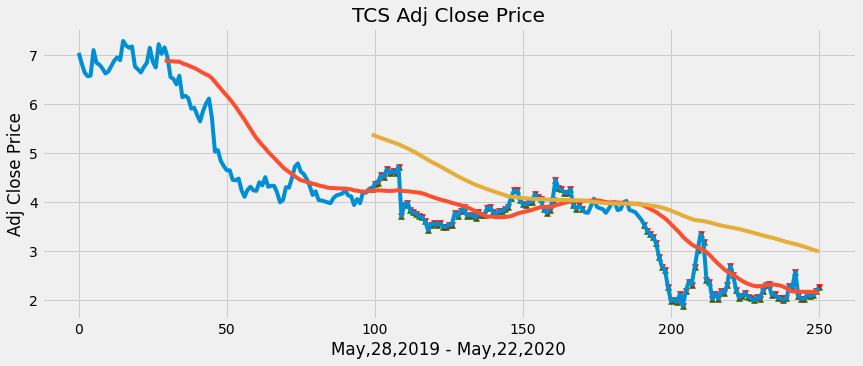

In [41]:
#visualise the data
plt.figure(figsize=(13,5))
plt.plot(TCS['Adj Close'],label='TCS')
plt.plot(sma30['Adj Close'],label='SMA30')
plt.plot(sma100['Adj Close'],label='SMA100')
plt.scatter(data.index, data['Buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
plt.scatter(data.index, data['Buy_signal_price'],label = 'Sell', marker = 'v', color = 'red')
plt.title('TCS Adj Close Price')
plt.xlabel('May,28,2019 - May,22,2020')
plt.ylabel('Adj Close Price')
plt.show()